# Calculation of Forgotten events

Files needed:
* target files:
    * precursors-train.txt: tokenized train set of the precursors
    * product-train.txt: tokenized train set of the product
    * class-multi-train.txt: tokenized file of the reaction class (ex 1.2.1 -> 1 1.2 1.2.1)
* predictions:
    * can_**example_name**_step_xxxxx.out.txt: file with the canonical top-1 predictions
    * **example_name**_step_xxxxx.out.txt_gold_score: file with the gold scores of the target
    * **example_name**_step_xxxxx.out.txt_log_probs: files with the log probabilites of the top-1 predictions

Variables to set: **datapath**, **resultspath**

Outputs:
* "files/": the full dataframe (non-ordered by forgotten events). ALl the reduced datasets files
* "figures/": the plots

In [ ]:
from onmt_utils.ForgettingEval import *
from onmt_utils.plotter_forgetting import *

In [2]:
# Lambda function to costumize the experiment names: 
# it must be set in order that the name is the checkpoint step number
get_names = lambda base_names: ['_'.join(b.split('_')[8:9]) for b in base_names]

In [3]:
# path where to save the plots
savepath="figures"

In [3]:
# Paths to files 
datapath = "path/to/target/files"
resultspath = "path/to/results/files"

# Creation of the evaluation class
forg = ForgettingForward(datapath,'dataset_name', split='train', n_best = 1)
forg.add_experiment(resultspath, func = get_names)
forg.print_experiments()

Experiments list for split train: 
107072
114720
122368
130016
137664
145312
15296
152960
160608
168256
175904
183552
191200
198848
206496
214144
221792
22944
229440
237088
244736
252384
260032
30592
38240
45888
53536
61184
68832
7648
76480
84128
91776
99424


## DataFrame with all the needed values

In [4]:
forg.split_evaluator.df

## Calculation of fogotten events


In [5]:
steps = forg.calculate_forgotten_events()
print(steps)
print(len(steps), 'epochs\n')

['7648', '15296', '22944', '30592', '38240', '45888', '53536', '61184', '68832', '76480', '84128', '91776', '99424', '107072', '114720', '122368', '130016', '137664', '145312', '152960', '160608', '168256', '175904', '183552', '191200', '198848', '206496', '214144', '221792', '229440', '237088', '244736', '252384', '260032']
34 epochs



14


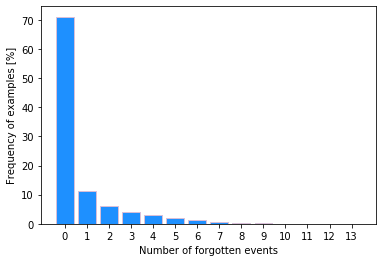

In [40]:
plot_forgotten_events(forg, save = True, png_path = savepath)

[1907749  471111]
2378860


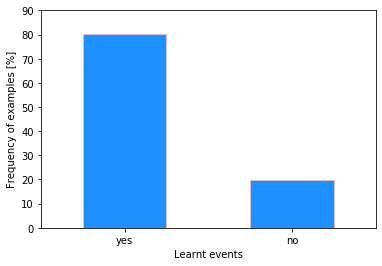

In [10]:
plot_neverlearnt_events(forg, save = True, png_path = savepath)

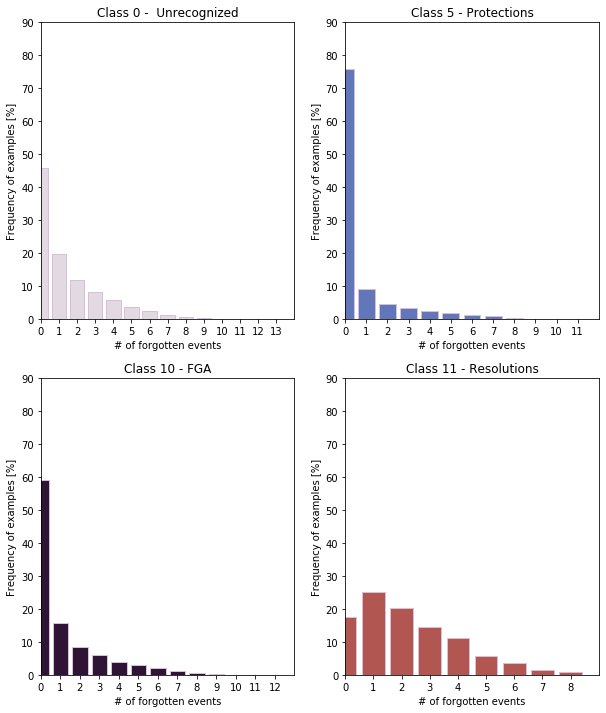

In [18]:
plot_forgotten_events_by_class(forg, n_classes = 12, ylimit = 90.0,\
                               save = True, png_path = savepath, figsize = (10, 12))

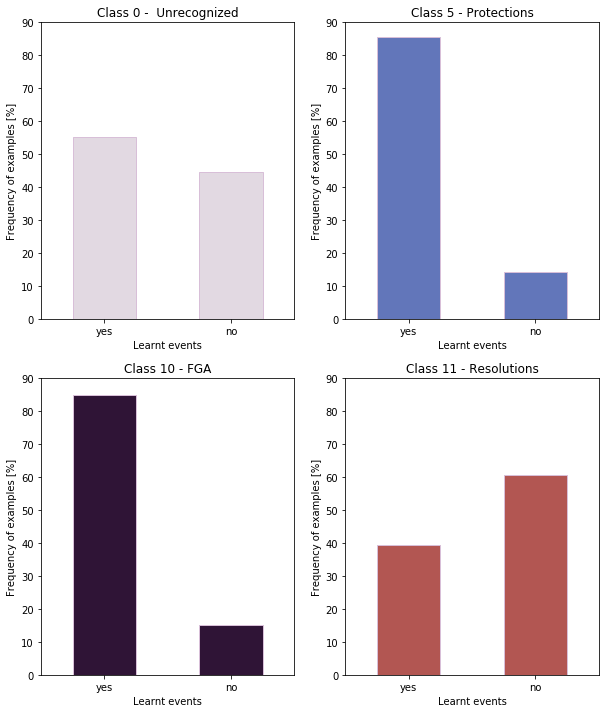

In [20]:
plot_neverlearnt_events_by_class(forg, n_classes = 12, figsize = (10, 12), ylimit = 100.0,\
                                save = True, png_path = savepath)


## Creation of the new cleaned training files


In [8]:
sorted_df = forg.split_evaluator.df
sorted_df['forgotten_events_with_inf'] = sorted_df['forgotten_events'].values
sorted_df.loc[sorted_df['first_learnt'] == math.inf, 'forgotten_events_with_inf'] = math.inf


### Save a dataframe with source target and forgotten events


In [18]:
sorted_df[['source','target','forgotten_events_with_inf']].to_csv(r'files/forgetting.csv')

In [9]:
# Sort the dataframe
sorted_df = sorted_df.sort_values(by='forgotten_events_with_inf', ascending=False).reset_index(drop=True)
sorted_df

2378860


### Remove examples in percentage, starting from the most forgotten ones 

In [6]:
files_savepath = 'files'

### 0.1%

In [10]:
n_to_remove = np.ceil(0.001*len(sorted_df))
sorted_df_01percent = sorted_df.loc[n_to_remove:]
print(len(sorted_df_01percent))
sorted_df_01percent
removed_01_perc = sorted_df.loc[0:n_to_remove].sample(n=100)


2376481


In [19]:
folder = files_savepath +'/01perc'
%mkdir -p 'files/01perc'

with open(folder + '/product-train.txt','w') as f:
    f.write('\n'.join(sorted_df_01percent['tok_target'].values))
with open(folder + '/precursors-train.txt','w') as f:
    f.write('\n'.join(sorted_df_01percent['tok_source'].values))
with open(folder + '/class-multi-train.txt','w') as f:
    f.write('\n'.join(sorted_df_01percent['tok_class_ground_truth'].values))
with open(folder + '/class-single-train.txt','w') as f:
    f.write('\n'.join(sorted_df_01percent['superclass_ground_truth'].values))


### 1%

In [ ]:
n_to_remove = np.ceil(0.01*len(sorted_df))
sorted_df_1percent = sorted_df.loc[n_to_remove:]

In [21]:
folder = files_savepath + '/1perc'
%mkdir -p 'files/1perc'

with open(folder + '/product-train.txt','w') as f:
    f.write('\n'.join(sorted_df_1percent['tok_target'].values))
with open(folder + '/precursors-train.txt','w') as f:
    f.write('\n'.join(sorted_df_1percent['tok_source'].values))
with open(folder + '/class-multi-train.txt','w') as f:
    f.write('\n'.join(sorted_df_1percent['tok_class_ground_truth'].values))
with open(folder + '/class-single-train.txt','w') as f:
    f.write('\n'.join(sorted_df_1percent['superclass_ground_truth'].values))


### 5%

In [ ]:
n_to_remove = np.ceil(0.05*len(sorted_df))
sorted_df_5percent = sorted_df.loc[n_to_remove:]

In [23]:
folder = files_savepath + '/5perc'
%mkdir -p 'files/5perc'

with open(folder + '/product-train.txt','w') as f:
    f.write('\n'.join(sorted_df_5percent['tok_target'].values))
with open(folder + '/precursors-train.txt','w') as f:
    f.write('\n'.join(sorted_df_5percent['tok_source'].values))
with open(folder + '/class-multi-train.txt','w') as f:
    f.write('\n'.join(sorted_df_5percent['tok_class_ground_truth'].values))
with open(folder + '/class-single-train.txt','w') as f:
    f.write('\n'.join(sorted_df_5percent['superclass_ground_truth'].values))


### 10%

In [ ]:
n_to_remove = np.ceil(0.1*len(sorted_df))
sorted_df_10percent = sorted_df.loc[n_to_remove:]

In [25]:
folder = files_savepath + '/10perc'
%mkdir -p 'files/10perc'

with open(folder + '/product-train.txt','w') as f:
    f.write('\n'.join(sorted_df_10percent['tok_target'].values))
with open(folder + '/precursors-train.txt','w') as f:
    f.write('\n'.join(sorted_df_10percent['tok_source'].values))
with open(folder + '/class-multi-train.txt','w') as f:
    f.write('\n'.join(sorted_df_10percent['tok_class_ground_truth'].values))
with open(folder + '/class-single-train.txt','w') as f:
    f.write('\n'.join(sorted_df_10percent['superclass_ground_truth'].values))



### 15%

In [ ]:
n_to_remove = np.ceil(0.15*len(sorted_df))
sorted_df_15percent = sorted_df.loc[n_to_remove:]

In [28]:
folder = files_savepath + '/15perc'
%mkdir -p 'files/15perc'

with open(folder + '/product-train.txt','w') as f:
    f.write('\n'.join(sorted_df_15percent['tok_target'].values))
with open(folder + '/precursors-train.txt','w') as f:
    f.write('\n'.join(sorted_df_15percent['tok_source'].values))
with open(folder + '/class-multi-train.txt','w') as f:
    f.write('\n'.join(sorted_df_15percent['tok_class_ground_truth'].values))
with open(folder + '/class-single-train.txt','w') as f:
    f.write('\n'.join(sorted_df_15percent['superclass_ground_truth'].values))


### 20%

In [ ]:
n_to_remove = np.ceil(0.2*len(sorted_df))
sorted_df_20percent = sorted_df.loc[n_to_remove:]

In [30]:
folder = files_savepath + '/20perc'
%mkdir -p 'files/20perc'

with open(folder + '/product-train.txt','w') as f:
    f.write('\n'.join(sorted_df_20percent['tok_target'].values))
with open(folder + '/precursors-train.txt','w') as f:
    f.write('\n'.join(sorted_df_20percent['tok_source'].values))
with open(folder + '/class-multi-train.txt','w') as f:
    f.write('\n'.join(sorted_df_20percent['tok_class_ground_truth'].values))
with open(folder + '/class-single-train.txt','w') as f:
    f.write('\n'.join(sorted_df_20percent['superclass_ground_truth'].values))


### 25%

In [ ]:
n_to_remove = np.ceil(0.25*len(sorted_df))
sorted_df_25percent = sorted_df.loc[n_to_remove:]

In [32]:
folder = files_savepath + '/25perc'
%mkdir -p 'files/25perc'

with open(folder + '/product-train.txt','w') as f:
    f.write('\n'.join(sorted_df_25percent['tok_target'].values))
with open(folder + '/precursors-train.txt','w') as f:
    f.write('\n'.join(sorted_df_25percent['tok_source'].values))
with open(folder + '/class-multi-train.txt','w') as f:
    f.write('\n'.join(sorted_df_25percent['tok_class_ground_truth'].values))
with open(folder + '/class-single-train.txt','w') as f:
    f.write('\n'.join(sorted_df_25percent['superclass_ground_truth'].values))


### 30%

In [ ]:
n_to_remove = np.ceil(0.3*len(sorted_df))
sorted_df_30percent = sorted_df.loc[n_to_remove:]

In [34]:
folder = files_savepath + '/30perc'
%mkdir -p 'files/30perc'

with open(folder + '/product-train.txt','w') as f:
    f.write('\n'.join(sorted_df_30percent['tok_target'].values))
with open(folder + '/precursors-train.txt','w') as f:
    f.write('\n'.join(sorted_df_30percent['tok_source'].values))
with open(folder + '/class-multi-train.txt','w') as f:
    f.write('\n'.join(sorted_df_30percent['tok_class_ground_truth'].values))
with open(folder + '/class-single-train.txt','w') as f:
    f.write('\n'.join(sorted_df_30percent['superclass_ground_truth'].values))


### 40%

In [ ]:
n_to_remove = np.ceil(0.4*len(sorted_df))
sorted_df_40percent = sorted_df.loc[n_to_remove:]

In [36]:
folder = files_savepath + '/40perc'
%mkdir -p 'files/40perc'

with open(folder + '/product-train.txt','w') as f:
    f.write('\n'.join(sorted_df_40percent['tok_target'].values))
with open(folder + '/precursors-train.txt','w') as f:
    f.write('\n'.join(sorted_df_40percent['tok_source'].values))
with open(folder + '/class-multi-train.txt','w') as f:
    f.write('\n'.join(sorted_df_40percent['tok_class_ground_truth'].values))
with open(folder + '/class-single-train.txt','w') as f:
    f.write('\n'.join(sorted_df_40percent['superclass_ground_truth'].values))

